##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Treine sua primeira rede neural: classificação básica

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Veja em TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Execute em Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Veja código fonte em GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Baixe o notebook</a>
  </td>
</table>

Note: A nossa comunidade TensorFlow traduziu estes documentos. Como as traduções da comunidade são *o melhor esforço*, não há garantias de que sejam uma reflexão exata e atualizada da [documentação oficial em Inglês](https://www.tensorflow.org/?hl=en). Se tem alguma sugestão para melhorar esta tradução, por favor envie um pull request para o repositório do GitHub [tensorflow/docs](https://github.com/tensorflow/docs). Para se voluntariar para escrever ou rever as traduções da comunidade, contacte a [lista docs@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Este tutorial treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas. Tudo bem se você não entender todos os detalhes; este é um visão geral de um programa do TensorFlow com detalhes explicados enquanto progredimos.

O guia usa [tf.keras](https://www.tensorflow.org/guide/keras), uma API alto-nível para construir e treinar modelos no TensorFlow.

In [3]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST tem como intenção substituir a clássica base de dados [MNIST](http://yann.lecun.com/exdb/mnist/ )— frequentemente usada como "Hello, World" de programas de aprendizado de máquina (*machine learning*) para visão computacional. A base de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de roupas que usaremos aqui.

Esse tutorial usa a Fashion MNIST para variar, e porque é um problema um pouco mais desafiador que o regular MNIST. Ambas bases são relativamente pequenas e são usadas para verificar se um algoritmo funciona como esperado. Elas são bons pontos de partida para testar e debugar código.

Usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. Você pode acessar a Fashion MNIST directly diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 4202496/26421880 [===>..........................] - ETA: 0s

 9920512/26421880 [==========>...................] - ETA: 0s

15605760/26421880 [================>.............] - ETA: 0s

21282816/26421880 [=======================>......] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


Carregando a base de dados que retorna quatro NumPy arrays:

* Os *arrays* `train_images` e `train_labels`  são o *conjunto de treinamento*— os dados do modelo usados para aprender.
* O modelo é testado com o *conjunto de teste*, os *arrays* `test_images` e `test_labels`.

As imagens são arrays  NumPy de 28x28, com os valores des pixels entre 0 to 255. As *labels* (alvo da classificação) são um  array  de inteiros, no intervalo de  0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem é mapeada com um só label. Já que o *nome das classes* não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [7]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjnto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens :

In [10]:
len(test_labels)

10000

## Pré-processe os dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

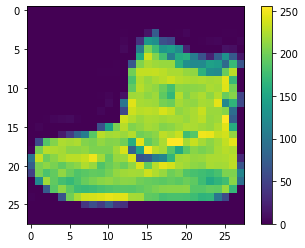

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o *conjunto de treinamento* e o *conjunto de teste* podem ser pré-processados do mesmo modo:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem abaixo.

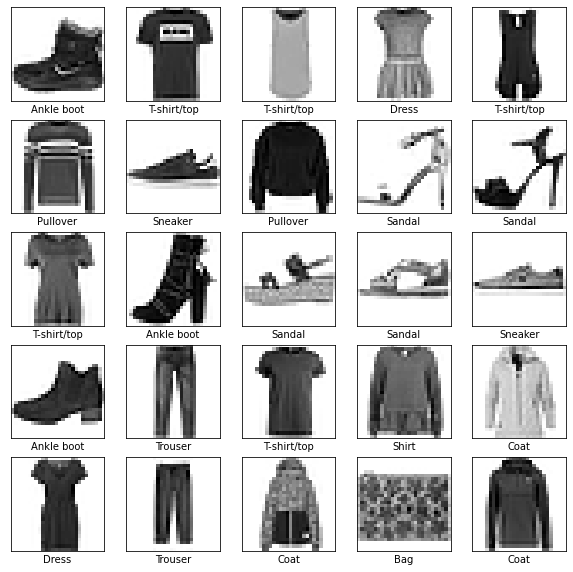

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

### Montar as camadas

O principal bloco de construção da rede neural é a camada (*layer*). As camadas (*layers*) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do *deep learning* consiste encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem paramêtros que são aprendidos durante o treinamento.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os emfilere. Essa camada não tem paramêtros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consite de uma sequência de duas camadas `tf.keras.layers.Dense`. Essa são camadas neurais *densely connected*, ou *fully connected*. A primeira camada `Dense` tem 128 nós (ou neurônios). A segunda (e última) camda é uma *softmax*  de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de *compilação*:

* *Função Loss* —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para *guiar* o modelo para direção certa.
* *Optimizer* —Isso é como o modelo se atualiza com base no dado que ele vê e sua função *loss*.
* *Métricas* —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treine o modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
2. O modelo aprende como associar as imagens as *labels*.
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as *labels*  do array `test_labels`.

Para começar a treinar, chame o método `model.fit`— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 2.6323 - accuracy: 0.0625

  35/1875 [..............................] - ETA: 2s - loss: 1.2435 - accuracy: 0.5902

  70/1875 [>.............................] - ETA: 2s - loss: 1.0194 - accuracy: 0.6545

 105/1875 [>.............................] - ETA: 2s - loss: 0.9107 - accuracy: 0.6854

 139/1875 [=>............................] - ETA: 2s - loss: 0.8406 - accuracy: 0.7080

 173/1875 [=>............................] - ETA: 2s - loss: 0.7996 - accuracy: 0.7229

 206/1875 [==>...........................] - ETA: 2s - loss: 0.7749 - accuracy: 0.7304

 239/1875 [==>...........................] - ETA: 2s - loss: 0.7474 - accuracy: 0.7410

 272/1875 [===>..........................] - ETA: 2s - loss: 0.7315 - accuracy: 0.7475

 306/1875 [===>..........................] - ETA: 2s - loss: 0.7097 - accuracy: 0.7555

 341/1875 [====>.........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.7626

 377/1875 [=====>........................] - ETA: 2s - loss: 0.6719 - accuracy: 0.7699

 412/1875 [=====>........................] - ETA: 2s - loss: 0.6545 - accuracy: 0.7756

 445/1875 [======>.......................] - ETA: 2s - loss: 0.6422 - accuracy: 0.7793

 479/1875 [======>.......................] - ETA: 2s - loss: 0.6338 - accuracy: 0.7816

 514/1875 [=======>......................] - ETA: 2s - loss: 0.6231 - accuracy: 0.7845

 547/1875 [=======>......................] - ETA: 1s - loss: 0.6175 - accuracy: 0.7868

 581/1875 [========>.....................] - ETA: 1s - loss: 0.6096 - accuracy: 0.7897

 614/1875 [========>.....................] - ETA: 1s - loss: 0.6047 - accuracy: 0.7914

 648/1875 [=========>....................] - ETA: 1s - loss: 0.5960 - accuracy: 0.7947

 683/1875 [=========>....................] - ETA: 1s - loss: 0.5921 - accuracy: 0.7957

 717/1875 [==========>...................] - ETA: 1s - loss: 0.5839 - accuracy: 0.7979

 751/1875 [===========>..................] - ETA: 1s - loss: 0.5798 - accuracy: 0.7992

 787/1875 [===========>..................] - ETA: 1s - loss: 0.5749 - accuracy: 0.8008

 820/1875 [============>.................] - ETA: 1s - loss: 0.5703 - accuracy: 0.8023

 854/1875 [============>.................] - ETA: 1s - loss: 0.5671 - accuracy: 0.8028

 888/1875 [=============>................] - ETA: 1s - loss: 0.5640 - accuracy: 0.8033

 922/1875 [=============>................] - ETA: 1s - loss: 0.5602 - accuracy: 0.8048

 956/1875 [==============>...............] - ETA: 1s - loss: 0.5563 - accuracy: 0.8060

 989/1875 [==============>...............] - ETA: 1s - loss: 0.5544 - accuracy: 0.8064

1023/1875 [===============>..............] - ETA: 1s - loss: 0.5525 - accuracy: 0.8068

1057/1875 [===============>..............] - ETA: 1s - loss: 0.5489 - accuracy: 0.8078

1091/1875 [================>.............] - ETA: 1s - loss: 0.5443 - accuracy: 0.8096

1126/1875 [=================>............] - ETA: 1s - loss: 0.5413 - accuracy: 0.8107

1160/1875 [=================>............] - ETA: 1s - loss: 0.5401 - accuracy: 0.8110

1194/1875 [==================>...........] - ETA: 1s - loss: 0.5358 - accuracy: 0.8123

1228/1875 [==================>...........] - ETA: 0s - loss: 0.5328 - accuracy: 0.8135

1262/1875 [===================>..........] - ETA: 0s - loss: 0.5294 - accuracy: 0.8146

1297/1875 [===================>..........] - ETA: 0s - loss: 0.5272 - accuracy: 0.8151

1332/1875 [====================>.........] - ETA: 0s - loss: 0.5252 - accuracy: 0.8157

1366/1875 [====================>.........] - ETA: 0s - loss: 0.5230 - accuracy: 0.8161

1401/1875 [=====================>........] - ETA: 0s - loss: 0.5208 - accuracy: 0.8165

1435/1875 [=====================>........] - ETA: 0s - loss: 0.5177 - accuracy: 0.8177

1469/1875 [======================>.......] - ETA: 0s - loss: 0.5161 - accuracy: 0.8181

1502/1875 [=======================>......] - ETA: 0s - loss: 0.5148 - accuracy: 0.8186

1536/1875 [=======================>......] - ETA: 0s - loss: 0.5124 - accuracy: 0.8195

1569/1875 [========================>.....] - ETA: 0s - loss: 0.5105 - accuracy: 0.8199

1603/1875 [========================>.....] - ETA: 0s - loss: 0.5089 - accuracy: 0.8204

1636/1875 [=========================>....] - ETA: 0s - loss: 0.5073 - accuracy: 0.8210

1669/1875 [=========================>....] - ETA: 0s - loss: 0.5050 - accuracy: 0.8218

1703/1875 [==========================>...] - ETA: 0s - loss: 0.5031 - accuracy: 0.8226

1737/1875 [==========================>...] - ETA: 0s - loss: 0.5009 - accuracy: 0.8235

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4990 - accuracy: 0.8241

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4972 - accuracy: 0.8247

1840/1875 [============================>.] - ETA: 0s - loss: 0.4950 - accuracy: 0.8253

1874/1875 [============================>.] - ETA: 0s - loss: 0.4942 - accuracy: 0.8257

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4942 - accuracy: 0.8257


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.5060 - accuracy: 0.8125

  35/1875 [..............................] - ETA: 2s - loss: 0.3788 - accuracy: 0.8643

  69/1875 [>.............................] - ETA: 2s - loss: 0.3870 - accuracy: 0.8596

 102/1875 [>.............................] - ETA: 2s - loss: 0.3966 - accuracy: 0.8615

 136/1875 [=>............................] - ETA: 2s - loss: 0.3909 - accuracy: 0.8660

 171/1875 [=>............................] - ETA: 2s - loss: 0.3877 - accuracy: 0.8668

 206/1875 [==>...........................] - ETA: 2s - loss: 0.3907 - accuracy: 0.8654

 241/1875 [==>...........................] - ETA: 2s - loss: 0.3935 - accuracy: 0.8638

 276/1875 [===>..........................] - ETA: 2s - loss: 0.3912 - accuracy: 0.8638

 309/1875 [===>..........................] - ETA: 2s - loss: 0.3905 - accuracy: 0.8638

 342/1875 [====>.........................] - ETA: 2s - loss: 0.3878 - accuracy: 0.8639

 377/1875 [=====>........................] - ETA: 2s - loss: 0.3843 - accuracy: 0.8650

 411/1875 [=====>........................] - ETA: 2s - loss: 0.3846 - accuracy: 0.8650

 445/1875 [======>.......................] - ETA: 2s - loss: 0.3883 - accuracy: 0.8636

 478/1875 [======>.......................] - ETA: 2s - loss: 0.3882 - accuracy: 0.8639

 512/1875 [=======>......................] - ETA: 2s - loss: 0.3870 - accuracy: 0.8643

 548/1875 [=======>......................] - ETA: 1s - loss: 0.3879 - accuracy: 0.8644

 581/1875 [========>.....................] - ETA: 1s - loss: 0.3869 - accuracy: 0.8642

 614/1875 [========>.....................] - ETA: 1s - loss: 0.3891 - accuracy: 0.8628

 648/1875 [=========>....................] - ETA: 1s - loss: 0.3882 - accuracy: 0.8630

 681/1875 [=========>....................] - ETA: 1s - loss: 0.3873 - accuracy: 0.8631

 715/1875 [==========>...................] - ETA: 1s - loss: 0.3874 - accuracy: 0.8623

 749/1875 [==========>...................] - ETA: 1s - loss: 0.3854 - accuracy: 0.8633

 782/1875 [===========>..................] - ETA: 1s - loss: 0.3839 - accuracy: 0.8634

 815/1875 [============>.................] - ETA: 1s - loss: 0.3831 - accuracy: 0.8635

 850/1875 [============>.................] - ETA: 1s - loss: 0.3812 - accuracy: 0.8640

 884/1875 [=============>................] - ETA: 1s - loss: 0.3802 - accuracy: 0.8644

 918/1875 [=============>................] - ETA: 1s - loss: 0.3809 - accuracy: 0.8640

 952/1875 [==============>...............] - ETA: 1s - loss: 0.3812 - accuracy: 0.8641

 985/1875 [==============>...............] - ETA: 1s - loss: 0.3792 - accuracy: 0.8649

1019/1875 [===============>..............] - ETA: 1s - loss: 0.3794 - accuracy: 0.8651

1052/1875 [===============>..............] - ETA: 1s - loss: 0.3794 - accuracy: 0.8650

1085/1875 [================>.............] - ETA: 1s - loss: 0.3804 - accuracy: 0.8648

1118/1875 [================>.............] - ETA: 1s - loss: 0.3798 - accuracy: 0.8652

1152/1875 [=================>............] - ETA: 1s - loss: 0.3802 - accuracy: 0.8648

1187/1875 [=================>............] - ETA: 1s - loss: 0.3805 - accuracy: 0.8650

1221/1875 [==================>...........] - ETA: 0s - loss: 0.3816 - accuracy: 0.8645

1255/1875 [===================>..........] - ETA: 0s - loss: 0.3807 - accuracy: 0.8646

1289/1875 [===================>..........] - ETA: 0s - loss: 0.3804 - accuracy: 0.8648

1323/1875 [====================>.........] - ETA: 0s - loss: 0.3800 - accuracy: 0.8649

1356/1875 [====================>.........] - ETA: 0s - loss: 0.3802 - accuracy: 0.8648

1391/1875 [=====================>........] - ETA: 0s - loss: 0.3796 - accuracy: 0.8649

1425/1875 [=====================>........] - ETA: 0s - loss: 0.3800 - accuracy: 0.8648

1459/1875 [======================>.......] - ETA: 0s - loss: 0.3788 - accuracy: 0.8650

1495/1875 [======================>.......] - ETA: 0s - loss: 0.3794 - accuracy: 0.8646

1529/1875 [=======================>......] - ETA: 0s - loss: 0.3784 - accuracy: 0.8648

1564/1875 [========================>.....] - ETA: 0s - loss: 0.3775 - accuracy: 0.8651

1598/1875 [========================>.....] - ETA: 0s - loss: 0.3765 - accuracy: 0.8654

1631/1875 [=========================>....] - ETA: 0s - loss: 0.3762 - accuracy: 0.8654

1663/1875 [=========================>....] - ETA: 0s - loss: 0.3772 - accuracy: 0.8651

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3768 - accuracy: 0.8650

1731/1875 [==========================>...] - ETA: 0s - loss: 0.3760 - accuracy: 0.8652

1766/1875 [===========================>..] - ETA: 0s - loss: 0.3759 - accuracy: 0.8651

1799/1875 [===========================>..] - ETA: 0s - loss: 0.3750 - accuracy: 0.8654

1832/1875 [============================>.] - ETA: 0s - loss: 0.3753 - accuracy: 0.8651

1863/1875 [============================>.] - ETA: 0s - loss: 0.3755 - accuracy: 0.8653

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8654


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3812 - accuracy: 0.9062

  33/1875 [..............................] - ETA: 2s - loss: 0.3379 - accuracy: 0.8873

  67/1875 [>.............................] - ETA: 2s - loss: 0.3270 - accuracy: 0.8839

 102/1875 [>.............................] - ETA: 2s - loss: 0.3258 - accuracy: 0.8851

 137/1875 [=>............................] - ETA: 2s - loss: 0.3341 - accuracy: 0.8821

 172/1875 [=>............................] - ETA: 2s - loss: 0.3392 - accuracy: 0.8797

 207/1875 [==>...........................] - ETA: 2s - loss: 0.3348 - accuracy: 0.8800

 240/1875 [==>...........................] - ETA: 2s - loss: 0.3367 - accuracy: 0.8798

 273/1875 [===>..........................] - ETA: 2s - loss: 0.3340 - accuracy: 0.8808

 308/1875 [===>..........................] - ETA: 2s - loss: 0.3362 - accuracy: 0.8803

 342/1875 [====>.........................] - ETA: 2s - loss: 0.3372 - accuracy: 0.8791

 376/1875 [=====>........................] - ETA: 2s - loss: 0.3353 - accuracy: 0.8798

 411/1875 [=====>........................] - ETA: 2s - loss: 0.3346 - accuracy: 0.8803

 444/1875 [======>.......................] - ETA: 2s - loss: 0.3332 - accuracy: 0.8798

 477/1875 [======>.......................] - ETA: 2s - loss: 0.3336 - accuracy: 0.8797

 509/1875 [=======>......................] - ETA: 2s - loss: 0.3296 - accuracy: 0.8813

 543/1875 [=======>......................] - ETA: 1s - loss: 0.3291 - accuracy: 0.8817

 576/1875 [========>.....................] - ETA: 1s - loss: 0.3301 - accuracy: 0.8820

 611/1875 [========>.....................] - ETA: 1s - loss: 0.3329 - accuracy: 0.8810

 646/1875 [=========>....................] - ETA: 1s - loss: 0.3319 - accuracy: 0.8816

 681/1875 [=========>....................] - ETA: 1s - loss: 0.3322 - accuracy: 0.8813

 715/1875 [==========>...................] - ETA: 1s - loss: 0.3329 - accuracy: 0.8813

 749/1875 [==========>...................] - ETA: 1s - loss: 0.3332 - accuracy: 0.8808

 784/1875 [===========>..................] - ETA: 1s - loss: 0.3330 - accuracy: 0.8810

 817/1875 [============>.................] - ETA: 1s - loss: 0.3321 - accuracy: 0.8810

 850/1875 [============>.................] - ETA: 1s - loss: 0.3333 - accuracy: 0.8804

 884/1875 [=============>................] - ETA: 1s - loss: 0.3334 - accuracy: 0.8803

 918/1875 [=============>................] - ETA: 1s - loss: 0.3338 - accuracy: 0.8802

 952/1875 [==============>...............] - ETA: 1s - loss: 0.3348 - accuracy: 0.8799

 987/1875 [==============>...............] - ETA: 1s - loss: 0.3342 - accuracy: 0.8799

1021/1875 [===============>..............] - ETA: 1s - loss: 0.3329 - accuracy: 0.8801

1055/1875 [===============>..............] - ETA: 1s - loss: 0.3329 - accuracy: 0.8799

1089/1875 [================>.............] - ETA: 1s - loss: 0.3325 - accuracy: 0.8801

1123/1875 [================>.............] - ETA: 1s - loss: 0.3331 - accuracy: 0.8801

1158/1875 [=================>............] - ETA: 1s - loss: 0.3320 - accuracy: 0.8804

1191/1875 [==================>...........] - ETA: 1s - loss: 0.3328 - accuracy: 0.8800

1226/1875 [==================>...........] - ETA: 0s - loss: 0.3336 - accuracy: 0.8796

1259/1875 [===================>..........] - ETA: 0s - loss: 0.3340 - accuracy: 0.8796

1293/1875 [===================>..........] - ETA: 0s - loss: 0.3335 - accuracy: 0.8798

1328/1875 [====================>.........] - ETA: 0s - loss: 0.3334 - accuracy: 0.8801

1362/1875 [====================>.........] - ETA: 0s - loss: 0.3342 - accuracy: 0.8797

1396/1875 [=====================>........] - ETA: 0s - loss: 0.3344 - accuracy: 0.8795

1431/1875 [=====================>........] - ETA: 0s - loss: 0.3345 - accuracy: 0.8793

1465/1875 [======================>.......] - ETA: 0s - loss: 0.3356 - accuracy: 0.8790

1499/1875 [======================>.......] - ETA: 0s - loss: 0.3362 - accuracy: 0.8787

1533/1875 [=======================>......] - ETA: 0s - loss: 0.3361 - accuracy: 0.8788

1568/1875 [========================>.....] - ETA: 0s - loss: 0.3364 - accuracy: 0.8789

1603/1875 [========================>.....] - ETA: 0s - loss: 0.3362 - accuracy: 0.8789

1638/1875 [=========================>....] - ETA: 0s - loss: 0.3363 - accuracy: 0.8788

1672/1875 [=========================>....] - ETA: 0s - loss: 0.3369 - accuracy: 0.8784

1705/1875 [==========================>...] - ETA: 0s - loss: 0.3372 - accuracy: 0.8783

1739/1875 [==========================>...] - ETA: 0s - loss: 0.3377 - accuracy: 0.8780

1772/1875 [===========================>..] - ETA: 0s - loss: 0.3381 - accuracy: 0.8779

1806/1875 [===========================>..] - ETA: 0s - loss: 0.3373 - accuracy: 0.8782

1841/1875 [============================>.] - ETA: 0s - loss: 0.3367 - accuracy: 0.8783

1875/1875 [==============================] - ETA: 0s - loss: 0.3366 - accuracy: 0.8782

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3366 - accuracy: 0.8782


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1686 - accuracy: 0.9375

  34/1875 [..............................] - ETA: 2s - loss: 0.3127 - accuracy: 0.8888

  68/1875 [>.............................] - ETA: 2s - loss: 0.3182 - accuracy: 0.8828

 104/1875 [>.............................] - ETA: 2s - loss: 0.3120 - accuracy: 0.8813

 139/1875 [=>............................] - ETA: 2s - loss: 0.3192 - accuracy: 0.8788

 174/1875 [=>............................] - ETA: 2s - loss: 0.3241 - accuracy: 0.8781

 208/1875 [==>...........................] - ETA: 2s - loss: 0.3215 - accuracy: 0.8800

 242/1875 [==>...........................] - ETA: 2s - loss: 0.3194 - accuracy: 0.8808

 276/1875 [===>..........................] - ETA: 2s - loss: 0.3157 - accuracy: 0.8818

 310/1875 [===>..........................] - ETA: 2s - loss: 0.3121 - accuracy: 0.8836

 344/1875 [====>.........................] - ETA: 2s - loss: 0.3106 - accuracy: 0.8844

 377/1875 [=====>........................] - ETA: 2s - loss: 0.3111 - accuracy: 0.8838

 411/1875 [=====>........................] - ETA: 2s - loss: 0.3095 - accuracy: 0.8850

 446/1875 [======>.......................] - ETA: 2s - loss: 0.3081 - accuracy: 0.8859

 481/1875 [======>.......................] - ETA: 2s - loss: 0.3110 - accuracy: 0.8857

 515/1875 [=======>......................] - ETA: 2s - loss: 0.3103 - accuracy: 0.8861

 548/1875 [=======>......................] - ETA: 1s - loss: 0.3102 - accuracy: 0.8862

 581/1875 [========>.....................] - ETA: 1s - loss: 0.3103 - accuracy: 0.8859

 617/1875 [========>.....................] - ETA: 1s - loss: 0.3131 - accuracy: 0.8842

 650/1875 [=========>....................] - ETA: 1s - loss: 0.3116 - accuracy: 0.8845

 683/1875 [=========>....................] - ETA: 1s - loss: 0.3127 - accuracy: 0.8844

 717/1875 [==========>...................] - ETA: 1s - loss: 0.3133 - accuracy: 0.8843

 751/1875 [===========>..................] - ETA: 1s - loss: 0.3147 - accuracy: 0.8838

 784/1875 [===========>..................] - ETA: 1s - loss: 0.3172 - accuracy: 0.8830

 818/1875 [============>.................] - ETA: 1s - loss: 0.3157 - accuracy: 0.8836

 853/1875 [============>.................] - ETA: 1s - loss: 0.3144 - accuracy: 0.8842

 889/1875 [=============>................] - ETA: 1s - loss: 0.3151 - accuracy: 0.8843

 923/1875 [=============>................] - ETA: 1s - loss: 0.3143 - accuracy: 0.8851

 957/1875 [==============>...............] - ETA: 1s - loss: 0.3137 - accuracy: 0.8852

 991/1875 [==============>...............] - ETA: 1s - loss: 0.3137 - accuracy: 0.8851

1025/1875 [===============>..............] - ETA: 1s - loss: 0.3136 - accuracy: 0.8853

1059/1875 [===============>..............] - ETA: 1s - loss: 0.3141 - accuracy: 0.8851

1095/1875 [================>.............] - ETA: 1s - loss: 0.3145 - accuracy: 0.8853

1131/1875 [=================>............] - ETA: 1s - loss: 0.3138 - accuracy: 0.8856

1166/1875 [=================>............] - ETA: 1s - loss: 0.3129 - accuracy: 0.8858

1200/1875 [==================>...........] - ETA: 0s - loss: 0.3133 - accuracy: 0.8855

1236/1875 [==================>...........] - ETA: 0s - loss: 0.3132 - accuracy: 0.8853

1271/1875 [===================>..........] - ETA: 0s - loss: 0.3128 - accuracy: 0.8856

1305/1875 [===================>..........] - ETA: 0s - loss: 0.3124 - accuracy: 0.8857

1339/1875 [====================>.........] - ETA: 0s - loss: 0.3122 - accuracy: 0.8856

1374/1875 [====================>.........] - ETA: 0s - loss: 0.3123 - accuracy: 0.8857

1410/1875 [=====================>........] - ETA: 0s - loss: 0.3131 - accuracy: 0.8854

1445/1875 [======================>.......] - ETA: 0s - loss: 0.3128 - accuracy: 0.8855

1481/1875 [======================>.......] - ETA: 0s - loss: 0.3115 - accuracy: 0.8859

1518/1875 [=======================>......] - ETA: 0s - loss: 0.3107 - accuracy: 0.8862

1554/1875 [=======================>......] - ETA: 0s - loss: 0.3104 - accuracy: 0.8862

1591/1875 [========================>.....] - ETA: 0s - loss: 0.3114 - accuracy: 0.8859

1625/1875 [=========================>....] - ETA: 0s - loss: 0.3117 - accuracy: 0.8857

1660/1875 [=========================>....] - ETA: 0s - loss: 0.3120 - accuracy: 0.8857

1692/1875 [==========================>...] - ETA: 0s - loss: 0.3122 - accuracy: 0.8857

1725/1875 [==========================>...] - ETA: 0s - loss: 0.3128 - accuracy: 0.8854

1757/1875 [===========================>..] - ETA: 0s - loss: 0.3123 - accuracy: 0.8856

1790/1875 [===========================>..] - ETA: 0s - loss: 0.3127 - accuracy: 0.8855

1822/1875 [============================>.] - ETA: 0s - loss: 0.3122 - accuracy: 0.8857

1854/1875 [============================>.] - ETA: 0s - loss: 0.3124 - accuracy: 0.8857

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3125 - accuracy: 0.8859


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2323 - accuracy: 0.9375

  34/1875 [..............................] - ETA: 2s - loss: 0.2889 - accuracy: 0.8998

  67/1875 [>.............................] - ETA: 2s - loss: 0.2883 - accuracy: 0.9002

 102/1875 [>.............................] - ETA: 2s - loss: 0.2812 - accuracy: 0.8989

 136/1875 [=>............................] - ETA: 2s - loss: 0.2952 - accuracy: 0.8943

 170/1875 [=>............................] - ETA: 2s - loss: 0.2914 - accuracy: 0.8936

 204/1875 [==>...........................] - ETA: 2s - loss: 0.2872 - accuracy: 0.8943

 238/1875 [==>...........................] - ETA: 2s - loss: 0.2960 - accuracy: 0.8910

 273/1875 [===>..........................] - ETA: 2s - loss: 0.2927 - accuracy: 0.8916

 308/1875 [===>..........................] - ETA: 2s - loss: 0.2960 - accuracy: 0.8910

 342/1875 [====>.........................] - ETA: 2s - loss: 0.2977 - accuracy: 0.8895

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2963 - accuracy: 0.8902

 415/1875 [=====>........................] - ETA: 2s - loss: 0.2951 - accuracy: 0.8912

 450/1875 [======>.......................] - ETA: 2s - loss: 0.2952 - accuracy: 0.8911

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2941 - accuracy: 0.8915

 520/1875 [=======>......................] - ETA: 1s - loss: 0.2959 - accuracy: 0.8912

 555/1875 [=======>......................] - ETA: 1s - loss: 0.2958 - accuracy: 0.8913

 590/1875 [========>.....................] - ETA: 1s - loss: 0.2965 - accuracy: 0.8913

 625/1875 [=========>....................] - ETA: 1s - loss: 0.2955 - accuracy: 0.8913

 661/1875 [=========>....................] - ETA: 1s - loss: 0.2954 - accuracy: 0.8915

 694/1875 [==========>...................] - ETA: 1s - loss: 0.2951 - accuracy: 0.8914

 727/1875 [==========>...................] - ETA: 1s - loss: 0.2936 - accuracy: 0.8920

 762/1875 [===========>..................] - ETA: 1s - loss: 0.2927 - accuracy: 0.8922

 798/1875 [===========>..................] - ETA: 1s - loss: 0.2923 - accuracy: 0.8921

 832/1875 [============>.................] - ETA: 1s - loss: 0.2931 - accuracy: 0.8918

 866/1875 [============>.................] - ETA: 1s - loss: 0.2918 - accuracy: 0.8924

 900/1875 [=============>................] - ETA: 1s - loss: 0.2922 - accuracy: 0.8924

 934/1875 [=============>................] - ETA: 1s - loss: 0.2932 - accuracy: 0.8922

 969/1875 [==============>...............] - ETA: 1s - loss: 0.2926 - accuracy: 0.8921

1004/1875 [===============>..............] - ETA: 1s - loss: 0.2924 - accuracy: 0.8923

1038/1875 [===============>..............] - ETA: 1s - loss: 0.2919 - accuracy: 0.8922

1073/1875 [================>.............] - ETA: 1s - loss: 0.2922 - accuracy: 0.8923

1107/1875 [================>.............] - ETA: 1s - loss: 0.2918 - accuracy: 0.8925

1144/1875 [=================>............] - ETA: 1s - loss: 0.2914 - accuracy: 0.8925

1179/1875 [=================>............] - ETA: 1s - loss: 0.2920 - accuracy: 0.8922

1214/1875 [==================>...........] - ETA: 0s - loss: 0.2919 - accuracy: 0.8922

1249/1875 [==================>...........] - ETA: 0s - loss: 0.2912 - accuracy: 0.8926

1283/1875 [===================>..........] - ETA: 0s - loss: 0.2909 - accuracy: 0.8927

1319/1875 [====================>.........] - ETA: 0s - loss: 0.2917 - accuracy: 0.8924

1354/1875 [====================>.........] - ETA: 0s - loss: 0.2912 - accuracy: 0.8927

1388/1875 [=====================>........] - ETA: 0s - loss: 0.2912 - accuracy: 0.8927

1423/1875 [=====================>........] - ETA: 0s - loss: 0.2912 - accuracy: 0.8926

1459/1875 [======================>.......] - ETA: 0s - loss: 0.2919 - accuracy: 0.8923

1494/1875 [======================>.......] - ETA: 0s - loss: 0.2920 - accuracy: 0.8922

1529/1875 [=======================>......] - ETA: 0s - loss: 0.2928 - accuracy: 0.8916

1564/1875 [========================>.....] - ETA: 0s - loss: 0.2935 - accuracy: 0.8916

1600/1875 [========================>.....] - ETA: 0s - loss: 0.2930 - accuracy: 0.8917

1635/1875 [=========================>....] - ETA: 0s - loss: 0.2932 - accuracy: 0.8917

1669/1875 [=========================>....] - ETA: 0s - loss: 0.2934 - accuracy: 0.8916

1704/1875 [==========================>...] - ETA: 0s - loss: 0.2935 - accuracy: 0.8917

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2939 - accuracy: 0.8914

1772/1875 [===========================>..] - ETA: 0s - loss: 0.2941 - accuracy: 0.8913

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2946 - accuracy: 0.8912

1843/1875 [============================>.] - ETA: 0s - loss: 0.2950 - accuracy: 0.8912

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943 - accuracy: 0.8915


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4404 - accuracy: 0.9375

  35/1875 [..............................] - ETA: 2s - loss: 0.2588 - accuracy: 0.9107

  69/1875 [>.............................] - ETA: 2s - loss: 0.2687 - accuracy: 0.9053

 103/1875 [>.............................] - ETA: 2s - loss: 0.2669 - accuracy: 0.9050

 138/1875 [=>............................] - ETA: 2s - loss: 0.2728 - accuracy: 0.9029

 174/1875 [=>............................] - ETA: 2s - loss: 0.2797 - accuracy: 0.9001

 209/1875 [==>...........................] - ETA: 2s - loss: 0.2770 - accuracy: 0.8991

 243/1875 [==>...........................] - ETA: 2s - loss: 0.2746 - accuracy: 0.9011

 278/1875 [===>..........................] - ETA: 2s - loss: 0.2759 - accuracy: 0.8995

 312/1875 [===>..........................] - ETA: 2s - loss: 0.2783 - accuracy: 0.8987

 346/1875 [====>.........................] - ETA: 2s - loss: 0.2813 - accuracy: 0.8979

 381/1875 [=====>........................] - ETA: 2s - loss: 0.2779 - accuracy: 0.8991

 415/1875 [=====>........................] - ETA: 2s - loss: 0.2791 - accuracy: 0.8977

 452/1875 [======>.......................] - ETA: 2s - loss: 0.2797 - accuracy: 0.8974

 488/1875 [======>.......................] - ETA: 2s - loss: 0.2801 - accuracy: 0.8970

 523/1875 [=======>......................] - ETA: 1s - loss: 0.2808 - accuracy: 0.8966

 557/1875 [=======>......................] - ETA: 1s - loss: 0.2808 - accuracy: 0.8964

 592/1875 [========>.....................] - ETA: 1s - loss: 0.2834 - accuracy: 0.8952

 627/1875 [=========>....................] - ETA: 1s - loss: 0.2831 - accuracy: 0.8958

 662/1875 [=========>....................] - ETA: 1s - loss: 0.2811 - accuracy: 0.8966

 697/1875 [==========>...................] - ETA: 1s - loss: 0.2801 - accuracy: 0.8965

 731/1875 [==========>...................] - ETA: 1s - loss: 0.2796 - accuracy: 0.8962

 767/1875 [===========>..................] - ETA: 1s - loss: 0.2804 - accuracy: 0.8961

 802/1875 [===========>..................] - ETA: 1s - loss: 0.2805 - accuracy: 0.8960

 837/1875 [============>.................] - ETA: 1s - loss: 0.2799 - accuracy: 0.8965

 873/1875 [============>.................] - ETA: 1s - loss: 0.2801 - accuracy: 0.8962

 908/1875 [=============>................] - ETA: 1s - loss: 0.2796 - accuracy: 0.8964

 942/1875 [==============>...............] - ETA: 1s - loss: 0.2799 - accuracy: 0.8960

 978/1875 [==============>...............] - ETA: 1s - loss: 0.2799 - accuracy: 0.8958

1012/1875 [===============>..............] - ETA: 1s - loss: 0.2799 - accuracy: 0.8958

1047/1875 [===============>..............] - ETA: 1s - loss: 0.2815 - accuracy: 0.8951

1083/1875 [================>.............] - ETA: 1s - loss: 0.2817 - accuracy: 0.8952

1118/1875 [================>.............] - ETA: 1s - loss: 0.2814 - accuracy: 0.8955

1153/1875 [=================>............] - ETA: 1s - loss: 0.2819 - accuracy: 0.8954

1189/1875 [==================>...........] - ETA: 0s - loss: 0.2827 - accuracy: 0.8951

1223/1875 [==================>...........] - ETA: 0s - loss: 0.2825 - accuracy: 0.8952

1259/1875 [===================>..........] - ETA: 0s - loss: 0.2823 - accuracy: 0.8951

1293/1875 [===================>..........] - ETA: 0s - loss: 0.2825 - accuracy: 0.8951

1328/1875 [====================>.........] - ETA: 0s - loss: 0.2821 - accuracy: 0.8955

1364/1875 [====================>.........] - ETA: 0s - loss: 0.2825 - accuracy: 0.8954

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2822 - accuracy: 0.8956

1431/1875 [=====================>........] - ETA: 0s - loss: 0.2827 - accuracy: 0.8956

1465/1875 [======================>.......] - ETA: 0s - loss: 0.2824 - accuracy: 0.8957

1500/1875 [=======================>......] - ETA: 0s - loss: 0.2824 - accuracy: 0.8958

1533/1875 [=======================>......] - ETA: 0s - loss: 0.2810 - accuracy: 0.8964

1567/1875 [========================>.....] - ETA: 0s - loss: 0.2810 - accuracy: 0.8964

1600/1875 [========================>.....] - ETA: 0s - loss: 0.2809 - accuracy: 0.8964

1635/1875 [=========================>....] - ETA: 0s - loss: 0.2811 - accuracy: 0.8963

1670/1875 [=========================>....] - ETA: 0s - loss: 0.2810 - accuracy: 0.8963

1705/1875 [==========================>...] - ETA: 0s - loss: 0.2803 - accuracy: 0.8964

1739/1875 [==========================>...] - ETA: 0s - loss: 0.2821 - accuracy: 0.8958

1774/1875 [===========================>..] - ETA: 0s - loss: 0.2814 - accuracy: 0.8962

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2820 - accuracy: 0.8960

1842/1875 [============================>.] - ETA: 0s - loss: 0.2823 - accuracy: 0.8959

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2812 - accuracy: 0.8963


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0540 - accuracy: 1.0000

  36/1875 [..............................] - ETA: 2s - loss: 0.2294 - accuracy: 0.9227

  71/1875 [>.............................] - ETA: 2s - loss: 0.2455 - accuracy: 0.9155

 107/1875 [>.............................] - ETA: 2s - loss: 0.2496 - accuracy: 0.9112

 143/1875 [=>............................] - ETA: 2s - loss: 0.2600 - accuracy: 0.9093

 178/1875 [=>............................] - ETA: 2s - loss: 0.2562 - accuracy: 0.9096

 213/1875 [==>...........................] - ETA: 2s - loss: 0.2572 - accuracy: 0.9107

 248/1875 [==>...........................] - ETA: 2s - loss: 0.2586 - accuracy: 0.9097

 284/1875 [===>..........................] - ETA: 2s - loss: 0.2577 - accuracy: 0.9090

 320/1875 [====>.........................] - ETA: 2s - loss: 0.2565 - accuracy: 0.9086

 354/1875 [====>.........................] - ETA: 2s - loss: 0.2574 - accuracy: 0.9078

 388/1875 [=====>........................] - ETA: 2s - loss: 0.2559 - accuracy: 0.9078

 422/1875 [=====>........................] - ETA: 2s - loss: 0.2551 - accuracy: 0.9074

 457/1875 [======>.......................] - ETA: 2s - loss: 0.2544 - accuracy: 0.9074

 492/1875 [======>.......................] - ETA: 1s - loss: 0.2545 - accuracy: 0.9076

 526/1875 [=======>......................] - ETA: 1s - loss: 0.2545 - accuracy: 0.9071

 560/1875 [=======>......................] - ETA: 1s - loss: 0.2567 - accuracy: 0.9065

 594/1875 [========>.....................] - ETA: 1s - loss: 0.2587 - accuracy: 0.9053

 628/1875 [=========>....................] - ETA: 1s - loss: 0.2586 - accuracy: 0.9049

 664/1875 [=========>....................] - ETA: 1s - loss: 0.2584 - accuracy: 0.9047

 700/1875 [==========>...................] - ETA: 1s - loss: 0.2577 - accuracy: 0.9049

 738/1875 [==========>...................] - ETA: 1s - loss: 0.2583 - accuracy: 0.9046

 772/1875 [===========>..................] - ETA: 1s - loss: 0.2586 - accuracy: 0.9041

 807/1875 [===========>..................] - ETA: 1s - loss: 0.2590 - accuracy: 0.9036

 843/1875 [============>.................] - ETA: 1s - loss: 0.2616 - accuracy: 0.9025

 878/1875 [=============>................] - ETA: 1s - loss: 0.2616 - accuracy: 0.9023

 913/1875 [=============>................] - ETA: 1s - loss: 0.2612 - accuracy: 0.9025

 948/1875 [==============>...............] - ETA: 1s - loss: 0.2625 - accuracy: 0.9020

 983/1875 [==============>...............] - ETA: 1s - loss: 0.2635 - accuracy: 0.9014

1018/1875 [===============>..............] - ETA: 1s - loss: 0.2644 - accuracy: 0.9014

1053/1875 [===============>..............] - ETA: 1s - loss: 0.2642 - accuracy: 0.9019

1089/1875 [================>.............] - ETA: 1s - loss: 0.2639 - accuracy: 0.9021

1124/1875 [================>.............] - ETA: 1s - loss: 0.2638 - accuracy: 0.9020

1158/1875 [=================>............] - ETA: 1s - loss: 0.2641 - accuracy: 0.9020

1192/1875 [==================>...........] - ETA: 0s - loss: 0.2642 - accuracy: 0.9020

1227/1875 [==================>...........] - ETA: 0s - loss: 0.2636 - accuracy: 0.9020

1262/1875 [===================>..........] - ETA: 0s - loss: 0.2635 - accuracy: 0.9023

1297/1875 [===================>..........] - ETA: 0s - loss: 0.2634 - accuracy: 0.9023

1331/1875 [====================>.........] - ETA: 0s - loss: 0.2628 - accuracy: 0.9025

1366/1875 [====================>.........] - ETA: 0s - loss: 0.2640 - accuracy: 0.9021

1400/1875 [=====================>........] - ETA: 0s - loss: 0.2640 - accuracy: 0.9019

1434/1875 [=====================>........] - ETA: 0s - loss: 0.2638 - accuracy: 0.9017

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2646 - accuracy: 0.9016

1506/1875 [=======================>......] - ETA: 0s - loss: 0.2643 - accuracy: 0.9017

1542/1875 [=======================>......] - ETA: 0s - loss: 0.2648 - accuracy: 0.9013

1576/1875 [========================>.....] - ETA: 0s - loss: 0.2653 - accuracy: 0.9015

1611/1875 [========================>.....] - ETA: 0s - loss: 0.2651 - accuracy: 0.9016

1647/1875 [=========================>....] - ETA: 0s - loss: 0.2660 - accuracy: 0.9014

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2665 - accuracy: 0.9013

1717/1875 [==========================>...] - ETA: 0s - loss: 0.2667 - accuracy: 0.9014

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2673 - accuracy: 0.9012

1787/1875 [===========================>..] - ETA: 0s - loss: 0.2675 - accuracy: 0.9011

1822/1875 [============================>.] - ETA: 0s - loss: 0.2677 - accuracy: 0.9009

1857/1875 [============================>.] - ETA: 0s - loss: 0.2677 - accuracy: 0.9008

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2677 - accuracy: 0.9008


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1804 - accuracy: 0.9688

  36/1875 [..............................] - ETA: 2s - loss: 0.2533 - accuracy: 0.9036

  71/1875 [>.............................] - ETA: 2s - loss: 0.2583 - accuracy: 0.8996

 106/1875 [>.............................] - ETA: 2s - loss: 0.2597 - accuracy: 0.8995

 141/1875 [=>............................] - ETA: 2s - loss: 0.2627 - accuracy: 0.9014

 177/1875 [=>............................] - ETA: 2s - loss: 0.2600 - accuracy: 0.9038

 212/1875 [==>...........................] - ETA: 2s - loss: 0.2554 - accuracy: 0.9037

 247/1875 [==>...........................] - ETA: 2s - loss: 0.2512 - accuracy: 0.9045

 283/1875 [===>..........................] - ETA: 2s - loss: 0.2552 - accuracy: 0.9039

 319/1875 [====>.........................] - ETA: 2s - loss: 0.2602 - accuracy: 0.9017

 355/1875 [====>.........................] - ETA: 2s - loss: 0.2588 - accuracy: 0.9033

 389/1875 [=====>........................] - ETA: 2s - loss: 0.2570 - accuracy: 0.9035

 423/1875 [=====>........................] - ETA: 2s - loss: 0.2565 - accuracy: 0.9033

 460/1875 [======>.......................] - ETA: 2s - loss: 0.2566 - accuracy: 0.9025

 497/1875 [======>.......................] - ETA: 1s - loss: 0.2545 - accuracy: 0.9034

 532/1875 [=======>......................] - ETA: 1s - loss: 0.2533 - accuracy: 0.9038

 566/1875 [========>.....................] - ETA: 1s - loss: 0.2537 - accuracy: 0.9039

 600/1875 [========>.....................] - ETA: 1s - loss: 0.2525 - accuracy: 0.9049

 635/1875 [=========>....................] - ETA: 1s - loss: 0.2552 - accuracy: 0.9043

 671/1875 [=========>....................] - ETA: 1s - loss: 0.2540 - accuracy: 0.9047

 705/1875 [==========>...................] - ETA: 1s - loss: 0.2553 - accuracy: 0.9036

 739/1875 [==========>...................] - ETA: 1s - loss: 0.2561 - accuracy: 0.9030

 773/1875 [===========>..................] - ETA: 1s - loss: 0.2552 - accuracy: 0.9034

 807/1875 [===========>..................] - ETA: 1s - loss: 0.2555 - accuracy: 0.9032

 842/1875 [============>.................] - ETA: 1s - loss: 0.2563 - accuracy: 0.9032

 877/1875 [=============>................] - ETA: 1s - loss: 0.2580 - accuracy: 0.9025

 912/1875 [=============>................] - ETA: 1s - loss: 0.2583 - accuracy: 0.9025

 946/1875 [==============>...............] - ETA: 1s - loss: 0.2585 - accuracy: 0.9025

 981/1875 [==============>...............] - ETA: 1s - loss: 0.2575 - accuracy: 0.9030

1017/1875 [===============>..............] - ETA: 1s - loss: 0.2572 - accuracy: 0.9034

1051/1875 [===============>..............] - ETA: 1s - loss: 0.2561 - accuracy: 0.9033

1085/1875 [================>.............] - ETA: 1s - loss: 0.2558 - accuracy: 0.9032

1120/1875 [================>.............] - ETA: 1s - loss: 0.2565 - accuracy: 0.9032

1156/1875 [=================>............] - ETA: 1s - loss: 0.2564 - accuracy: 0.9030

1190/1875 [==================>...........] - ETA: 0s - loss: 0.2568 - accuracy: 0.9030

1225/1875 [==================>...........] - ETA: 0s - loss: 0.2583 - accuracy: 0.9026

1258/1875 [===================>..........] - ETA: 0s - loss: 0.2584 - accuracy: 0.9025

1292/1875 [===================>..........] - ETA: 0s - loss: 0.2579 - accuracy: 0.9029

1325/1875 [====================>.........] - ETA: 0s - loss: 0.2586 - accuracy: 0.9025

1358/1875 [====================>.........] - ETA: 0s - loss: 0.2584 - accuracy: 0.9025

1392/1875 [=====================>........] - ETA: 0s - loss: 0.2582 - accuracy: 0.9024

1427/1875 [=====================>........] - ETA: 0s - loss: 0.2572 - accuracy: 0.9030

1461/1875 [======================>.......] - ETA: 0s - loss: 0.2570 - accuracy: 0.9030

1496/1875 [======================>.......] - ETA: 0s - loss: 0.2571 - accuracy: 0.9032

1531/1875 [=======================>......] - ETA: 0s - loss: 0.2583 - accuracy: 0.9029

1567/1875 [========================>.....] - ETA: 0s - loss: 0.2581 - accuracy: 0.9030

1602/1875 [========================>.....] - ETA: 0s - loss: 0.2576 - accuracy: 0.9032

1638/1875 [=========================>....] - ETA: 0s - loss: 0.2576 - accuracy: 0.9031

1673/1875 [=========================>....] - ETA: 0s - loss: 0.2576 - accuracy: 0.9032

1707/1875 [==========================>...] - ETA: 0s - loss: 0.2572 - accuracy: 0.9033

1741/1875 [==========================>...] - ETA: 0s - loss: 0.2578 - accuracy: 0.9031

1775/1875 [===========================>..] - ETA: 0s - loss: 0.2581 - accuracy: 0.9031

1809/1875 [===========================>..] - ETA: 0s - loss: 0.2579 - accuracy: 0.9033

1844/1875 [============================>.] - ETA: 0s - loss: 0.2579 - accuracy: 0.9034

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9033


Epoch 9/10


   1/1875 [..............................] - ETA: 0s - loss: 0.3164 - accuracy: 0.9062

  38/1875 [..............................] - ETA: 2s - loss: 0.2513 - accuracy: 0.9071

  74/1875 [>.............................] - ETA: 2s - loss: 0.2362 - accuracy: 0.9122

 108/1875 [>.............................] - ETA: 2s - loss: 0.2246 - accuracy: 0.9158

 143/1875 [=>............................] - ETA: 2s - loss: 0.2248 - accuracy: 0.9150

 176/1875 [=>............................] - ETA: 2s - loss: 0.2359 - accuracy: 0.9112

 211/1875 [==>...........................] - ETA: 2s - loss: 0.2335 - accuracy: 0.9135

 246/1875 [==>...........................] - ETA: 2s - loss: 0.2373 - accuracy: 0.9116

 281/1875 [===>..........................] - ETA: 2s - loss: 0.2399 - accuracy: 0.9107

 316/1875 [====>.........................] - ETA: 2s - loss: 0.2408 - accuracy: 0.9109

 352/1875 [====>.........................] - ETA: 2s - loss: 0.2424 - accuracy: 0.9108

 386/1875 [=====>........................] - ETA: 2s - loss: 0.2401 - accuracy: 0.9116

 423/1875 [=====>........................] - ETA: 2s - loss: 0.2402 - accuracy: 0.9113

 459/1875 [======>.......................] - ETA: 2s - loss: 0.2426 - accuracy: 0.9114

 495/1875 [======>.......................] - ETA: 1s - loss: 0.2414 - accuracy: 0.9115

 531/1875 [=======>......................] - ETA: 1s - loss: 0.2398 - accuracy: 0.9114

 567/1875 [========>.....................] - ETA: 1s - loss: 0.2409 - accuracy: 0.9107

 602/1875 [========>.....................] - ETA: 1s - loss: 0.2426 - accuracy: 0.9105

 636/1875 [=========>....................] - ETA: 1s - loss: 0.2423 - accuracy: 0.9108

 671/1875 [=========>....................] - ETA: 1s - loss: 0.2437 - accuracy: 0.9100

 706/1875 [==========>...................] - ETA: 1s - loss: 0.2440 - accuracy: 0.9102

 741/1875 [==========>...................] - ETA: 1s - loss: 0.2446 - accuracy: 0.9101

 776/1875 [===========>..................] - ETA: 1s - loss: 0.2451 - accuracy: 0.9101

 811/1875 [===========>..................] - ETA: 1s - loss: 0.2449 - accuracy: 0.9103

 847/1875 [============>.................] - ETA: 1s - loss: 0.2459 - accuracy: 0.9098

 881/1875 [=============>................] - ETA: 1s - loss: 0.2460 - accuracy: 0.9100

 916/1875 [=============>................] - ETA: 1s - loss: 0.2449 - accuracy: 0.9102

 950/1875 [==============>...............] - ETA: 1s - loss: 0.2435 - accuracy: 0.9104

 985/1875 [==============>...............] - ETA: 1s - loss: 0.2442 - accuracy: 0.9106

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2455 - accuracy: 0.9099

1054/1875 [===============>..............] - ETA: 1s - loss: 0.2461 - accuracy: 0.9095

1090/1875 [================>.............] - ETA: 1s - loss: 0.2457 - accuracy: 0.9095

1124/1875 [================>.............] - ETA: 1s - loss: 0.2452 - accuracy: 0.9097

1158/1875 [=================>............] - ETA: 1s - loss: 0.2456 - accuracy: 0.9095

1193/1875 [==================>...........] - ETA: 0s - loss: 0.2452 - accuracy: 0.9094

1227/1875 [==================>...........] - ETA: 0s - loss: 0.2454 - accuracy: 0.9093

1262/1875 [===================>..........] - ETA: 0s - loss: 0.2468 - accuracy: 0.9089

1296/1875 [===================>..........] - ETA: 0s - loss: 0.2464 - accuracy: 0.9089

1330/1875 [====================>.........] - ETA: 0s - loss: 0.2470 - accuracy: 0.9086

1366/1875 [====================>.........] - ETA: 0s - loss: 0.2470 - accuracy: 0.9086

1401/1875 [=====================>........] - ETA: 0s - loss: 0.2477 - accuracy: 0.9083

1435/1875 [=====================>........] - ETA: 0s - loss: 0.2474 - accuracy: 0.9083

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2479 - accuracy: 0.9085

1505/1875 [=======================>......] - ETA: 0s - loss: 0.2483 - accuracy: 0.9084

1542/1875 [=======================>......] - ETA: 0s - loss: 0.2483 - accuracy: 0.9084

1576/1875 [========================>.....] - ETA: 0s - loss: 0.2487 - accuracy: 0.9084

1611/1875 [========================>.....] - ETA: 0s - loss: 0.2489 - accuracy: 0.9084

1645/1875 [=========================>....] - ETA: 0s - loss: 0.2485 - accuracy: 0.9086

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2481 - accuracy: 0.9087

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2484 - accuracy: 0.9084

1748/1875 [==========================>...] - ETA: 0s - loss: 0.2485 - accuracy: 0.9083

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2484 - accuracy: 0.9082

1817/1875 [============================>.] - ETA: 0s - loss: 0.2482 - accuracy: 0.9081

1852/1875 [============================>.] - ETA: 0s - loss: 0.2475 - accuracy: 0.9082

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2480 - accuracy: 0.9081


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1724 - accuracy: 0.9375

  37/1875 [..............................] - ETA: 2s - loss: 0.2291 - accuracy: 0.9020

  72/1875 [>.............................] - ETA: 2s - loss: 0.2306 - accuracy: 0.9102

 107/1875 [>.............................] - ETA: 2s - loss: 0.2357 - accuracy: 0.9103

 143/1875 [=>............................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9097

 179/1875 [=>............................] - ETA: 2s - loss: 0.2396 - accuracy: 0.9096

 214/1875 [==>...........................] - ETA: 2s - loss: 0.2390 - accuracy: 0.9105

 249/1875 [==>...........................] - ETA: 2s - loss: 0.2398 - accuracy: 0.9089

 284/1875 [===>..........................] - ETA: 2s - loss: 0.2410 - accuracy: 0.9077

 320/1875 [====>.........................] - ETA: 2s - loss: 0.2402 - accuracy: 0.9077

 356/1875 [====>.........................] - ETA: 2s - loss: 0.2420 - accuracy: 0.9086

 390/1875 [=====>........................] - ETA: 2s - loss: 0.2417 - accuracy: 0.9092

 425/1875 [=====>........................] - ETA: 2s - loss: 0.2426 - accuracy: 0.9087

 461/1875 [======>.......................] - ETA: 2s - loss: 0.2419 - accuracy: 0.9096

 497/1875 [======>.......................] - ETA: 1s - loss: 0.2404 - accuracy: 0.9099

 532/1875 [=======>......................] - ETA: 1s - loss: 0.2377 - accuracy: 0.9109

 567/1875 [========>.....................] - ETA: 1s - loss: 0.2376 - accuracy: 0.9111

 601/1875 [========>.....................] - ETA: 1s - loss: 0.2381 - accuracy: 0.9113

 636/1875 [=========>....................] - ETA: 1s - loss: 0.2375 - accuracy: 0.9119

 672/1875 [=========>....................] - ETA: 1s - loss: 0.2377 - accuracy: 0.9116

 708/1875 [==========>...................] - ETA: 1s - loss: 0.2371 - accuracy: 0.9115

 743/1875 [==========>...................] - ETA: 1s - loss: 0.2357 - accuracy: 0.9121

 778/1875 [===========>..................] - ETA: 1s - loss: 0.2338 - accuracy: 0.9129

 813/1875 [============>.................] - ETA: 1s - loss: 0.2337 - accuracy: 0.9131

 849/1875 [============>.................] - ETA: 1s - loss: 0.2339 - accuracy: 0.9127

 884/1875 [=============>................] - ETA: 1s - loss: 0.2340 - accuracy: 0.9126

 920/1875 [=============>................] - ETA: 1s - loss: 0.2335 - accuracy: 0.9127

 954/1875 [==============>...............] - ETA: 1s - loss: 0.2335 - accuracy: 0.9127

 991/1875 [==============>...............] - ETA: 1s - loss: 0.2348 - accuracy: 0.9124

1026/1875 [===============>..............] - ETA: 1s - loss: 0.2352 - accuracy: 0.9123

1062/1875 [===============>..............] - ETA: 1s - loss: 0.2349 - accuracy: 0.9123

1098/1875 [================>.............] - ETA: 1s - loss: 0.2357 - accuracy: 0.9119

1132/1875 [=================>............] - ETA: 1s - loss: 0.2366 - accuracy: 0.9117

1167/1875 [=================>............] - ETA: 1s - loss: 0.2364 - accuracy: 0.9117

1202/1875 [==================>...........] - ETA: 0s - loss: 0.2366 - accuracy: 0.9117

1239/1875 [==================>...........] - ETA: 0s - loss: 0.2365 - accuracy: 0.9119

1275/1875 [===================>..........] - ETA: 0s - loss: 0.2368 - accuracy: 0.9118

1313/1875 [====================>.........] - ETA: 0s - loss: 0.2379 - accuracy: 0.9115

1349/1875 [====================>.........] - ETA: 0s - loss: 0.2390 - accuracy: 0.9111

1385/1875 [=====================>........] - ETA: 0s - loss: 0.2390 - accuracy: 0.9112

1419/1875 [=====================>........] - ETA: 0s - loss: 0.2391 - accuracy: 0.9114

1454/1875 [======================>.......] - ETA: 0s - loss: 0.2401 - accuracy: 0.9111

1489/1875 [======================>.......] - ETA: 0s - loss: 0.2401 - accuracy: 0.9111

1524/1875 [=======================>......] - ETA: 0s - loss: 0.2410 - accuracy: 0.9105

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2410 - accuracy: 0.9105

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2406 - accuracy: 0.9106

1629/1875 [=========================>....] - ETA: 0s - loss: 0.2407 - accuracy: 0.9105

1666/1875 [=========================>....] - ETA: 0s - loss: 0.2408 - accuracy: 0.9104

1700/1875 [==========================>...] - ETA: 0s - loss: 0.2406 - accuracy: 0.9107

1736/1875 [==========================>...] - ETA: 0s - loss: 0.2404 - accuracy: 0.9105

1772/1875 [===========================>..] - ETA: 0s - loss: 0.2404 - accuracy: 0.9106

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2407 - accuracy: 0.9104

1841/1875 [============================>.] - ETA: 0s - loss: 0.2409 - accuracy: 0.9104

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2410 - accuracy: 0.9103


À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento.

## Avalie a acurácia

Depois, compare como o modelo performou com o conjunto de teste:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3359 - accuracy: 0.8839



Test accuracy: 0.883899986743927


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um *overfitting*. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

## Faça predições

Com o modelo treinado, o usaremos para predições de algumas imagens.

In [18]:
predictions = model.predict(test_images)

Aqui, o modelo previu que a *label*  de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [19]:
predictions[0]

array([2.9411233e-06, 1.5474232e-06, 2.6270178e-07, 1.3696359e-07,
       2.3744051e-06, 4.8168341e-04, 2.2435849e-04, 1.9476734e-02,
       4.9622935e-07, 9.7980952e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a *confiança* do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada *label*  tem um maior valor de confiança:

In [20]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou `class_names[9]`. Examinando a label do teste, vemos que essa classificação é correta:

In [21]:
test_labels[0]

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição.

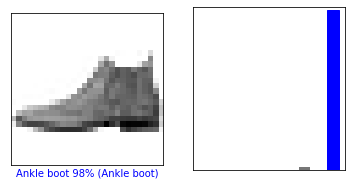

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

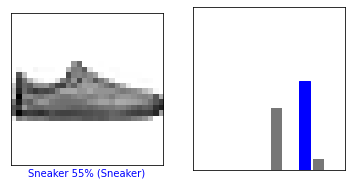

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estão confiante.

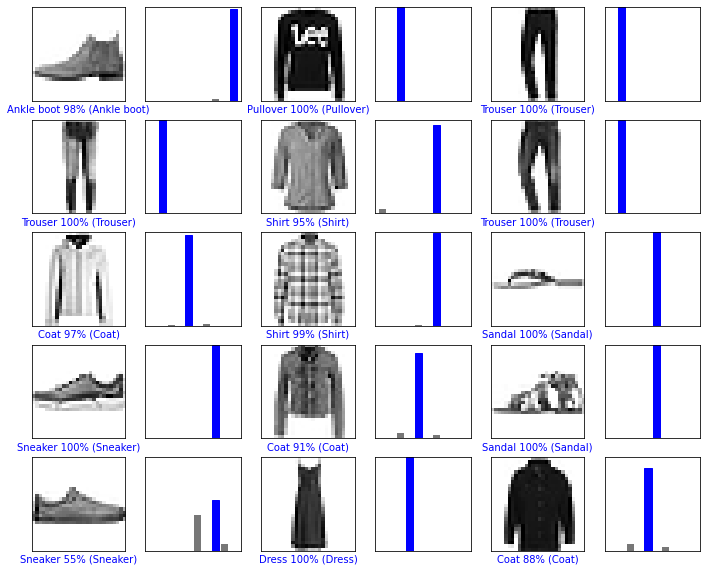

In [25]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finamente, use  o modelo treinado para fazer a predição de uma única imagem.

In [26]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


Modelos `tf.keras` são otimizados para fazer predições em um *batch*, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [27]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.9411233e-06 1.5474232e-06 2.6270178e-07 1.3696359e-07 2.3744051e-06
  4.8168341e-04 2.2435869e-04 1.9476725e-02 4.9622935e-07 9.7980952e-01]]


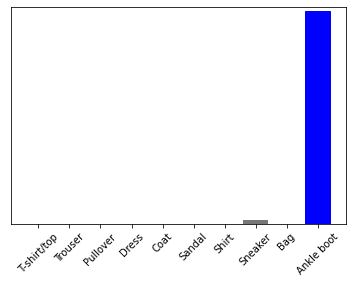

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna a lista de listas — uma lista para cada imagem em um *batch* de dados. Pegue a predição de nossa (única) imagem no *batch*:

In [30]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9.